# Morsy 7/7/20
## Curve Fitting Trainning
### 1. Linear Fit

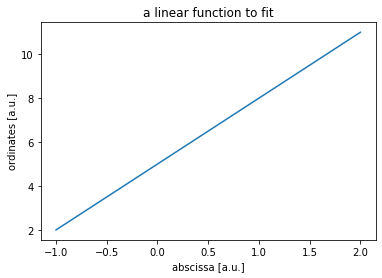

x = [-1.         -0.66666667 -0.33333333  0.          0.33333333  0.66666667
  1.          1.33333333  1.66666667  2.        ] y = [ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1,2,10) 
a = 3
b = 5
y = a*x+b # defining an arbitrary line to fit
plt.plot(x,y)
plt.xlabel('abscissa [a.u.]')
plt.ylabel('ordinates [a.u.]')
plt.title('a linear function to fit')
plt.show()
print('x = ' + str(x) + ' y = ' + str(y))

### Least Square Method

In [3]:
# The wikipedia page is incredibly obscure:
# https://en.wikipedia.org/wiki/Linear_least_squares

N = len(x)
xx = x*x
xy = x*y

# recovered least square coefficients Note: This is the mathmatical definition.
a_ls = (N*np.sum(x*y) - np.sum(x)*np.sum(y))/(N*np.sum(x*x)-np.sum(x)**2)
b_ls = (np.sum(y) - a_ls*np.sum(x))/N

# the fitted function
y_ls = a_ls*x + b_ls   # did we know that we are trying to fit a line from the get go?

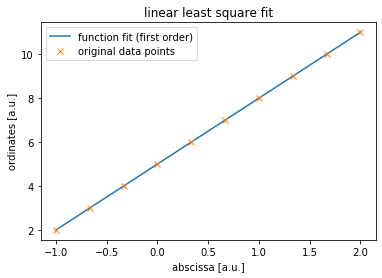

In [4]:
plt.plot(x,y_ls,x,y,'x')
plt.xlabel('abscissa [a.u.]')
plt.ylabel('ordinates [a.u.]')
plt.title('linear least square fit')
plt.legend(('function fit (first order)','original data points'))
plt.show()

### 2. Polynomial fit

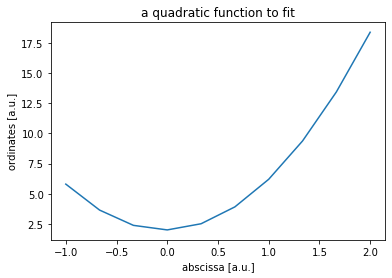

In [5]:
# We'll create a arbitrary second order polynomial
x2 = np.linspace(-1,2,10)
c2 = 4
c1 = 0.2
c0 = 2
y2 = c2*x2**2 + c1*x2**1 + c0

plt.plot(x2,y2)
plt.xlabel('abscissa [a.u.]')
plt.ylabel('ordinates [a.u.]')
plt.title('a quadratic function to fit')
plt.show()

In [6]:
fit_degree = 2
p2 = np.polyfit(x2,y2, fit_degree)

In [7]:
# the coeffecients of the fit are stored into p2 (descending order)
print(p2)
# compare with the original coefficients c2,c1, c0

[4.  0.2 2. ]


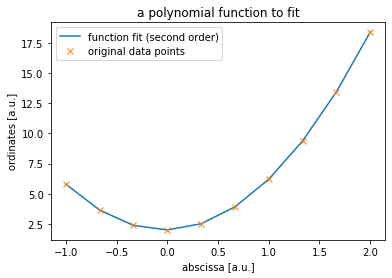

In [8]:
# it is possible to quickly look at the retrieved polynomial 
y2f = np.polyval(p2,x2)
plt.plot(x2,y2f,x2,y2,'x')
plt.xlabel('abscissa [a.u.]')
plt.ylabel('ordinates [a.u.]')
plt.title('a polynomial function to fit')
plt.legend(('function fit (second order)','original data points'))
plt.show()

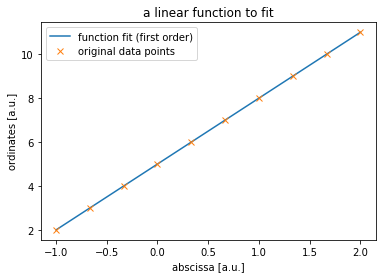

In [9]:
# You can also do a line fit by setting the fit degree to 1
p = np.polyfit(x,y, 1)
yf = np.polyval(p,x)
plt.plot(x,yf,x,y,'x')
plt.xlabel('abscissa [a.u.]')
plt.ylabel('ordinates [a.u.]')
plt.title('a linear function to fit')
plt.legend(('function fit (first order)','original data points'))
plt.show()

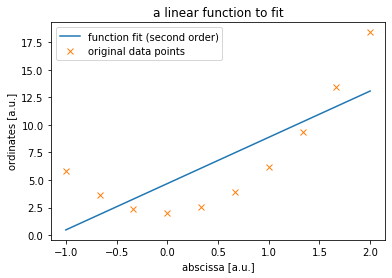

In [10]:
# You can fit a polynomial of arbitrary order with a fit of arbitrary order
p1 = np.polyfit(x2,y2, 1)
y1f = np.polyval(p1,x)
plt.plot(x,y1f,x2,y2,'x')
plt.xlabel('abscissa [a.u.]')
plt.ylabel('ordinates [a.u.]')
plt.title('a linear function to fit')
plt.legend(('function fit (second order)','original data points'))
plt.show()

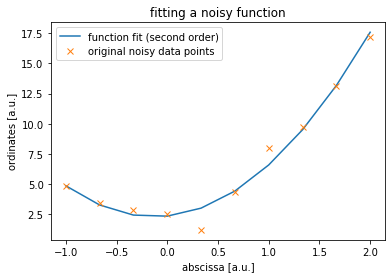

In [11]:
# There's more fun if you add noise to the data!

# adding noise (gaussian noise)
noise_amplitude_au = 1
y2n = y2 + np.random.randn(len(y2))* noise_amplitude_au

# fitting the noise data y2n
p2n = np.polyfit(x2,y2n,2)

y2nf = np.polyval(p2n,x2)
plt.plot(x2,y2nf,x2,y2n,'x')
plt.xlabel('abscissa [a.u.]')
plt.ylabel('ordinates [a.u.]')
plt.title('fitting a noisy function')
plt.legend(('function fit (second order)','original noisy data points'))
plt.show()

## 3. Advance fit
### Optmize method

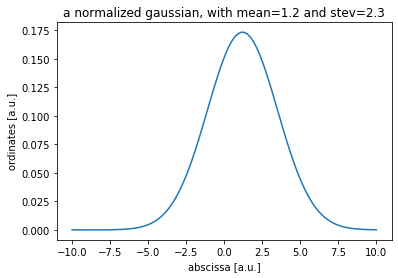

In [12]:
# function to fit
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10,10,100)
# defining a noralized gaussian
mu = 1.2
sigma = 2.3
g = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-0.5*((x-mu)/sigma)**2) # Gaussian function formula

plt.plot(x,g)
plt.xlabel('abscissa [a.u.]')
plt.ylabel('ordinates [a.u.]')
plt.title('a normalized gaussian, with mean=%1.1f' % mu+ ' and stev=%1.1f' %sigma)
plt.show()

In [13]:
import scipy.optimize

scale = x
data = g 

# removing the 1/(sigma*np.sqrt(2*np.pi)) part since it leads to potential zero-divide; replacing with a free parameter A
gauss = lambda A, mu, sigma: A*np.exp(-0.5*((x-mu)/sigma)**2)

In [14]:
# we need to create a cost function (with a single output, for optimization) 
# and repackage the arguments into a single array X
cost_function = lambda X: np.sum(np.abs(data-gauss(X[0], X[1], X[2]))**2)

In [15]:
gx = lambda X: gauss(X[0], X[1], X[2])
A = 1
mu = 0
sigma = 1

X = np.zeros(3)
X[0] = A
X[1] = mu
X[2] = sigma

#gauss(A, mu, sigma)
#gx(X)

cost2 = lambda X: np.sum(data - gx(X))

In [16]:
def gauss2(x, X):
    return X[0]*np.exp(-0.5*((x-X[1])/X[2])**2)
cost3 = lambda X: np.sum(data - gauss2(x, X))

In [17]:
cost3([1/(sigma*np.sqrt(2*np.pi)),mu,sigma])

-0.00027018851530544283

In [18]:
cost2([1/(sigma*np.sqrt(2*np.pi)),mu,sigma])

-0.00027018851530544283

In [19]:
# since we know how we have defined "the data", we can check that the cost function is equal to zero 
# when all the actual paramaters are inserted
cost_function([1/(sigma*np.sqrt(2*np.pi)),mu,sigma])
# (maybe easier if we show the actual values)
cost_function([0.17345316539192726,1.2,2.3])

0.0

In [20]:
# now we can summon the python optimization procedure

# it is important to start with a reasonable initial guess
x0 = [1,0,1]

# this ie where the magic happens:
xopt = scipy.optimize.fmin(func=cost_function, x0=x0)

print('\n result: fitted paramaters')
print(xopt)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 160
         Function evaluations: 287

 result: fitted paramaters
[0.17345196 1.20003133 2.30004279]


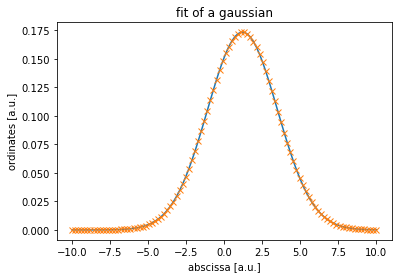

In [21]:
# we can show that the fit to our model is excellent
gfit = gauss(xopt[0],xopt[1],xopt[2])
plt.plot(x,gfit,x,g,'x')
plt.xlabel('abscissa [a.u.]')
plt.ylabel('ordinates [a.u.]')
plt.title('fit of a gaussian')
plt.show()

Optimization terminated successfully.
         Current function value: 0.011696
         Iterations: 150
         Function evaluations: 267


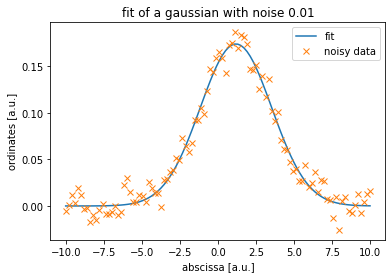

In [22]:
# things get more interesting when we add noise to the data (closer to an actual experiment)

noise_amplitude_au = 0.01
data_noisy = data + np.random.randn(len(data))*noise_amplitude_au

cost_function2 = lambda X: np.sum(np.abs(data_noisy-gauss(X[0], X[1], X[2]))**2)

# optimize!
xopt_n = scipy.optimize.fmin(cost_function2, x0=[1,0,1])

gfit_n = gauss(xopt_n[0],xopt_n[1],xopt_n[2])
plt.plot(x, gfit_n, x, data_noisy,'x')
plt.xlabel('abscissa [a.u.]')
plt.ylabel('ordinates [a.u.]')
plt.title('fit of a gaussian with noise %1.2f' % noise_amplitude_au)
plt.legend(('fit', 'noisy data'))
plt.show()

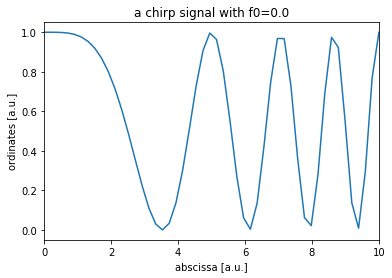

In [23]:
chirp = lambda f0: abs(np.cos(2*np.pi*f0*x**2))**2

f0 = 0.02
plt.plot(x,chirp(f0))
plt.xlabel('abscissa [a.u.]')
plt.ylabel('ordinates [a.u.]')
plt.title('a chirp signal with f0=%1.1f' %f0)
plt.xlim((0, x[-1]))
plt.show()

In [24]:
import scipy.optimize

scale = x
data2 = chirp(f0)


chirp_fit = lambda X: chirp(X[0]) * X[1] + X[2]

In [25]:
# we need to create a cost function (with a single output, for optimization) 
# and repackage the arguments into a single array X
cost_function = lambda X: np.sum(np.abs(data2-chirp_fit(X))**2)

In [26]:
# since we know how we have defined "the data", we can check that the cost function is equal to zero 
# when all the actual paramaters are inserted
X = [.02, 1, 0]
cost_function(X)

0.0

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 54


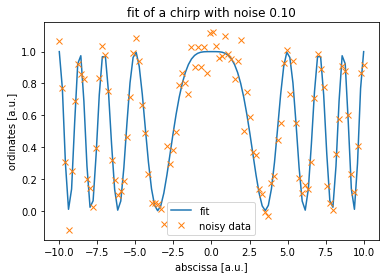

In [27]:
# things get more interesting when we add noise to the data (closer to an actual experiment)

noise_amplitude_au = .1
data_noisy = data2 + np.random.randn(len(data2))*noise_amplitude_au

cost_function2 = lambda X: np.sum(np.abs(data2-chirp_fit(X))**2)

# optimize!
xopt_n = scipy.optimize.fmin(cost_function2, x0=[.02,1,0])


plt.plot(x, chirp_fit(xopt_n), x, data_noisy,'x')
plt.xlabel('abscissa [a.u.]')
plt.ylabel('ordinates [a.u.]')
plt.title('fit of a chirp with noise %1.2f' % noise_amplitude_au)
plt.legend(('fit', 'noisy data'))
plt.show()